In [0]:
!pip install arabic_reshaper
!pip install python-bidi

# !wget 'https://www.fontyab.com/wp-content/uploads/Far_khodkar.zip'
# !unzip 'Far_khodkar.zip'

!wget 'https://www.fontyab.com/wp-content/uploads/B-Mitra.zip'
!unzip 'B-Mitra.zip'

  Running setup.py bdist_wheel for configparser ... - done
  Stored in directory: /root/.cache/pip/wheels/a3/61/79/424ef897a2f3b14684a7de5d89e8600b460b89663e6ce9d17c
Successfully built configparser
--2019-01-17 18:16:54--  https://www.fontyab.com/wp-content/uploads/B-Mitra.zip
Resolving www.fontyab.com (www.fontyab.com)... 89.42.209.236
Connecting to www.fontyab.com (www.fontyab.com)|89.42.209.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53127 (52K) [application/zip]
Saving to: ‘B-Mitra.zip’

B-Mitra.zip         100%[===================>]  51.88K  88.1KB/s    in 0.6s    

2019-01-17 18:16:56 (88.1 KB/s) - ‘B-Mitra.zip’ saved [53127/53127]

Archive:  B-Mitra.zip
   creating: B-Mitra/
  inflating: B-Mitra/B Mitra Bold_0.ttf  
  inflating: B-Mitra/B Mitra_0.ttf   
  inflating: B-Mitra/Fontyab.com.url  
  inflating: B-Mitra/Fontyab.ir.url  
  inflating: B-Mitra/read me!.txt    


In [0]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import numpy as np
import cv2
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# !cp X.npy 'gdrive/My Drive/OCR/X_30000.npy'
# !cp y.npy 'gdrive/My Drive/OCR/y_30000.npy'

!cp 'gdrive/My Drive/OCR/names.txt' names.txt
!cp 'gdrive/My Drive/OCR/lastName.txt' lastName.txt

In [0]:
img = Image.fromarray(np.zeros((90, 100)))
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('B-Mitra/B Mitr-0.ttf', 60)
text = get_display(arabic_reshaper.reshape("ی"))
draw.text((0, 10), text, 255, font=font)
img = 255 - np.array(img)
plt.imshow(img)

OSError: ignored

In [0]:
file = open('names.txt')
names = file.read().split('\n')
file.close()

file = open('lastName.txt')
names += file.read().split('\n')
file.close()

print("a total of", len(names), 'first an last names where found ')

fonts = ['Far_khodkar/Far_khodkar.ttf']
fonts = ['B-Mitra/B Mitra_0.ttf']

a total of 6351 first an last names where found 


{'آ': 0, 'ئ': 1, 'ی': 2, 'ر': 3, 'ا': 4, 'ل': 5, 'ب': 6, ' ': 7, 'ح': 8, 'ت': 9, 'ن': 10, 'ه': 11, 'د': 12, 'س': 13, 'ق': 14, 'گ': 15, 'خ': 16, 'ز': 17, 'ف': 18, 'م': 19, 'ک': 20, 'و': 21, 'ش': 22, 'ج': 23, 'ژ': 24, 'پ': 25, 'چ': 26, 'ث': 27, 'ذ': 28, 'غ': 29, 'ط': 30, 'ص': 31, '،': 32, 'ض': 33, 'ع': 34, 'ظ': 35, 'ي': 36, 'ك': 37, 'ء': 38, 'ة': 39, 'ُ': 40, 'أ': 41, 'ؤ': 42, '<END>': 43, '<PAD>': 44}
21


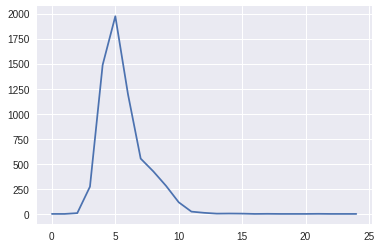

In [0]:
alphabet = {}
alphabet_inv = []
i = 0
max_len = 0
lens = [0] * 25
for word in names:
  lens[len(word)] += 1
  if (len(word) > max_len):
    max_len = len(word)
  for ch in word:
    if ch not in alphabet:
      if ch != '\ufeff' and ch != '\u200e' and ch != '\u200c':
        alphabet[ch] = i
        alphabet_inv.append(ch)
        i += 1

alphabet['<END>'] = i
alphabet['<PAD>'] = i + 1

print(alphabet)
print(max_len)
plt.plot(lens)
plt.show()

# New Section

0
shape of X : (500, 90, 100)
shape of y : (500, 7)
[20 43 44 44 44 44 44]


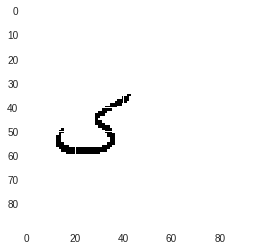

In [0]:
X = []
y = []
for i in range(500):
  if i % 1000 == 0:
    print(i)
    if i % 10000 == 0 and i != 0:
      X_ = np.array(X)
      y_ = np.array(y)
      np.save('X.npy', X_)
      np.save('y.npy', y_)
    
  font_index = np.random.randint(0, len(fonts))
  size = np.random.randint(40, 50)
  text_index = np.random.randint(0, len(names))
  while len(names[text_index]) > 6:
    text_index = np.random.randint(0, len(names))
  
#   if 390 <= size * 0.5 * len(names[text_index]):
#     pos_x = 10
#   else:
#     pos_x = np.random.randint(10, 400 - size * 0.5 * len(names[text_index]))
  pos_x = 10
  pos_y = np.random.randint(10, 90 - size * 1.1)
  
  img = Image.fromarray(np.zeros((90, 100)))
  draw = ImageDraw.Draw(img)  
  font = ImageFont.truetype(fonts[font_index], size)
  
  text = get_display(arabic_reshaper.reshape(names[text_index][0]))
  
  draw.text((pos_x, pos_y), text, 255, font=font)
  img = np.array(img)
  
  lable = []
#   for ch in names[text_index]:
#     if ch in alphabet:
#       lable += [alphabet[ch], alphabet[ch]]
#   lable = [alphabet[ch] for ch in names[text_index][0] if ch in alphabet]
  lable = [alphabet[names[text_index][0]]]
  lable.append(alphabet['<END>'])
  while len(lable) != 7:
    lable.append(alphabet['<PAD>'])
  
  X.append(img)
  y.append(lable)
  
X = np.array(X)
y = np.array(y)

# np.save('X.npy', X)
# np.save('y.npy', y)

print('shape of X :', X.shape)
print('shape of y :', y.shape)

plt.imshow(X[1])
print(y[1])

In [0]:
X = np.load('X.npy')
y = np.load('y.npy')

print(X.shape)
print(y.shape)

FileNotFoundError: ignored

In [0]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, SimpleRNN, Reshape, Dense, Flatten, TimeDistributed, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
import tensorflow as tf

Using TensorFlow backend.


In [0]:
X /= 255.
X = 1 - X

X = X.transpose((0, 2, 1))
X = X.reshape(X.shape + (1, ))

y = to_categorical(y)

X = X[:, ::-1, :, :]

X_train = X[:int(X.shape[0] * 0.8)]
y_train = y[:int(X.shape[0] * 0.8)]

X_test = X[int(X.shape[0] * 0.8):]
y_test = y[int(X.shape[0] * 0.8):]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 100, 90, 1)
(100, 100, 90, 1)
(400, 7, 45)
(100, 7, 45)


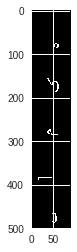

In [0]:
plt.imshow(X_test[:5, :, :, 0].reshape((-1, 90)))

In [0]:
CNNmodel = Sequential()
RNNmodel = Sequential()
model = Sequential()
CNNTmpModel = Sequential()

model.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(None, 90, 1))) # 28 * 76
model.add(MaxPooling2D((2,2), strides=(2,2))) # 14 * 38


model.add(Conv2D(16, (3, 3), padding='same', activation='relu')) # 12 * 36
model.add(MaxPooling2D((2,2), strides=(2,2))) # 6 * 18
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # 4 * 16
model.add(MaxPooling2D((2,2), strides=(1,2))) # 4 * 8
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # 2 * 6
model.add(MaxPooling2D((1,3), strides=(1,3))) # 1 * 3

model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # 1 * 1
model.add(MaxPooling2D((2,3), strides=(2,3)))

model.add(TimeDistributed(Flatten()))

model.add(SimpleRNN(64, activation='softmax', return_sequences=True))
model.add(SimpleRNN(45, activation='softmax', return_sequences=True))



CNNTmpModel.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(100, 90, 1))) # 28 * 76
CNNTmpModel.add(MaxPooling2D((2,2), strides=(2,2))) # 14 * 38


CNNTmpModel.add(Conv2D(16, (3, 3), padding='same', activation='relu')) # 12 * 36
CNNTmpModel.add(MaxPooling2D((2,2), strides=(2,2))) # 6 * 18
CNNTmpModel.add(Dropout(0.2))

CNNTmpModel.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # 4 * 16
CNNTmpModel.add(MaxPooling2D((2,2), strides=(1,2))) # 4 * 8
CNNTmpModel.add(Dropout(0.4))

CNNTmpModel.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # 2 * 6
CNNTmpModel.add(MaxPooling2D((1,3), strides=(1,3))) # 1 * 3

CNNTmpModel.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # 1 * 1
CNNTmpModel.add(MaxPooling2D((2,3), strides=(2,3)))

CNNTmpModel.add(MaxPooling2D((12, 1), strides=(12, 1)))
CNNTmpModel.add(Flatten())
CNNTmpModel.add(Dense(45, activation='softmax'))

In [0]:
model.summary()
CNNTmpModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, 90, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, 45, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, 45, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, 22, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 22, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, 22, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, 11, 32)      0         
__________

In [0]:
batch_size = 100

def ctc_loss(y_true, y_pred):
  y_true = tf.argmax(y_true, axis=2)
  y_true = tf.cast(y_true, tf.int32)
  
  zero = tf.constant(0, dtype=tf.int32)
  where = tf.not_equal(y_true, zero)
  indices = tf.where(where)
  values = tf.gather_nd(y_true, indices)
  sparse = tf.SparseTensor(indices, values, (batch_size, 25))
  
  return tf.reduce_mean(tf.nn.ctc_loss(sparse, y_pred, tf.ones(batch_size, dtype=tf.int32) * 50, time_major=False))

def ctc_lambda_func(labels, y_pred):
#   t = K.get_value(K.ctc_decode(y_pred, input_length=np.ones(100)*12,
#                            greedy=True)[0][0])

#   t = tf.hstack((t, -tf.ones((t.shape[0], 1))))
#   print(tf.argmin(t, axis=1))
  
  input_length = np.ones((batch_size, 1)) * 12
#   input_length = tf.argmin(t, axis=1)
  label_length = np.ones((batch_size, 1)) * 2
  
#   batch_real_len = 12 - tf.reduce_sum((tf.argmax(y_pred, )), axis=1)
  
  l = tf.argmax(labels, axis=2)
  # the 2 is critical here since the first couple outputs of the RNN
  # tend to be garbage:
  p = K.ctc_batch_cost(l, y_pred, input_length, label_length)
  return p

In [0]:
model.compile(optimizer=Adam(lr=1), loss=ctc_lambda_func)
CNNTmpModel.compile(optimizer=Adam(lr=1), loss='categorical_crossentropy', metrics=['acc'])

In [0]:
# CNNTmpModel.optimizer = Adam(lr=0.01)
# CNNTmpModel.fit(X_train, y_train[:, 0, :], batch_size=batch_size, epochs=200, validation_data=(X_test, y_test[:, 0, :]))


# for layer in model.layers[:11]:
#   layer.trainable = False

# model.optimizer = Adam(lr=0.1)
# for i in range(100):
  
w1 = CNNTmpModel.get_weights()
w2 = model.get_weights()

w2[:10] = w1[:10]
model.set_weights(w2)
model.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_test, y_test))


Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 2s 4ms/step - loss: 19.0528 - val_loss: 17.1849
Epoch 2/100
400/400 [==============================] - 0s 1ms/step - loss: 17.2398 - val_loss: 17.6654
Epoch 3/100
400/400 [==============================] - 0s 1ms/step - loss: 17.2051 - val_loss: 17.1755
Epoch 4/100
400/400 [==============================] - 0s 1ms/step - loss: 17.0672 - val_loss: 17.2807
Epoch 5/100
400/400 [==============================] - 0s 1ms/step - loss: 17.0522 - val_loss: 17.1200
Epoch 6/100
400/400 [==============================] - 0s 1ms/step - loss: 17.0055 - val_loss: 17.0319
Epoch 7/100
400/400 [==============================] - 0s 1ms/step - loss: 16.9948 - val_loss: 17.1364
Epoch 8/100
400/400 [==============================] - 0s 1ms/step - loss: 16.9715 - val_loss: 17.0363
Epoch 9/100
400/400 [==============================] - 0s 1ms/step - loss: 16.9703 - val_loss: 17.0222
Epoch 10/100
400/400 [=====

In [0]:
for i in range(len(be)):
  print(np.sum((be[i] - af[i]) ** 2))

0.80629146
0.11882983
7.811528
0.07857303
12.360407
0.1631856
92.01965
0.30326968
314.79446
0.3994335


(array([33.,  0.,  7., 18.,  0., 24.,  6., 38.,  0.,  0.,  9., 14.,  0.,
        16., 20., 10.,  0., 25.,  5.,  9.,  0., 12.,  4., 21.,  0., 32.,
        18., 19.,  0., 19.,  2.,  3.,  0., 18.,  3.,  0.,  0.,  1.,  0.,
         2.,  0.,  2.,  0.,  1.,  9.]),
 array([ 0.        ,  0.75555556,  1.51111111,  2.26666667,  3.02222222,
         3.77777778,  4.53333333,  5.28888889,  6.04444444,  6.8       ,
         7.55555556,  8.31111111,  9.06666667,  9.82222222, 10.57777778,
        11.33333333, 12.08888889, 12.84444444, 13.6       , 14.35555556,
        15.11111111, 15.86666667, 16.62222222, 17.37777778, 18.13333333,
        18.88888889, 19.64444444, 20.4       , 21.15555556, 21.91111111,
        22.66666667, 23.42222222, 24.17777778, 24.93333333, 25.68888889,
        26.44444444, 27.2       , 27.95555556, 28.71111111, 29.46666667,
        30.22222222, 30.97777778, 31.73333333, 32.48888889, 33.24444444,
        34.        ]),
 <a list of 45 Patch objects>)

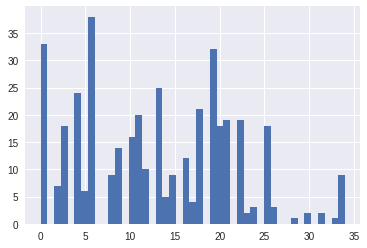

In [0]:
t = y_train.argmax(axis=2)[:, 0]
plt.hist(t, bins=45)

In [0]:
pred = model.predict(X_test[:1])

pred[1].shape

IndexError: ignored

In [0]:
def toText(X_row, alphabet_inv):
  X_chars = X_row.argmax(axis=1)
  text = ''
  for ch in X_chars:
    if ch < len(alphabet_inv):
      text += alphabet_inv[ch]
  return text

In [0]:
pred = model.predict(X_test[:10])
for i in range(10):
    print(i, toText(pred[i], alphabet_inv))
  
t = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1],
                         greedy=True)[0][0])

t = np.hstack((t, -np.ones((t.shape[0], 1))))
print(t.argmin(axis=1))
print(t)

0 ب
1 ب
2 ب
3 ب
4 ب
5 ب
6 ب
7 ب
8 ب
9 ب
[2 2 2 2 2 2 2 2 2 2]
[[ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]
 [ 6. 43. -1.]]


In [0]:
pred = CNNmodel.predict(X_test[1:2])[0]

print(pred.shape)

plt.imshow(pred[:, 0, :])

In [0]:
print(y_test[1])
pred = model_tmp.predict(X_test[1:2])[0]

print(pred.shape)

img = 255 - pred.reshape((24, 3*64)) / pred.max() * 256
img = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
cv2.imwrite('image_10_C.jpg', img)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(24, 3, 64)


True

In [0]:
pred = model_tmp.predict(X_train[:100])
print(pred.shape)

pred2 = model_tmp2.predict(pred)

prd = []
for i in range(1, 13):
  p = model_tmp2.predict(pred[:, :i])
  prd.append(p[:, -1, :])

prd = np.array(prd)
prd = np.transpose(prd, (1, 0, 2))
print(np.sum((prd - pred2) ** 2))

(100, 12, 64)
0.0


In [0]:
model_tmp = Sequential()
model_tmp2 = Sequential()

model_tmp.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(None, 90, 1))) # 28 * 76
model_tmp.add(MaxPooling2D((2,2), strides=(2,2))) # 14 * 38


model_tmp.add(Conv2D(16, (3, 3), padding='same', activation='relu')) # 12 * 36
model_tmp.add(MaxPooling2D((2,2), strides=(2,2))) # 6 * 18
model_tmp.add(Dropout(0.2))

model_tmp.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # 4 * 16
model_tmp.add(MaxPooling2D((2,2), strides=(1,2))) # 4 * 8
model_tmp.add(Dropout(0.4))

model_tmp.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # 2 * 6
model_tmp.add(MaxPooling2D((1,3), strides=(1,3))) # 1 * 3

model_tmp.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # 1 * 1
model_tmp.add(MaxPooling2D((2,3), strides=(2,3)))

model_tmp.add(TimeDistributed(Flatten()))

model_tmp.add(SimpleRNN(64, activation='softmax', return_sequences=True))
model_tmp2.add(SimpleRNN(45, activation='softmax', return_sequences=True, input_dim=64))

# model_tmp.add(MaxPooling2D((12, 1), strides=(12, 1)))
# model_tmp.add(Flatten())
# model_tmp.add(Dense(64, activation='relu'))
# model_tmp.add(Dense(45, activation='softmax'))

print(len(model.get_weights()))
for i in range(len(model.get_weights())):
  print('\t', i, model.get_weights()[i].shape)
model_tmp.set_weights(model.get_weights()[:13])
model_tmp2.set_weights(model.get_weights()[13:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(45, activation="softmax", return_sequences=True, input_shape=(None, 64))`


16
	 0 (3, 3, 1, 8)
	 1 (8,)
	 2 (3, 3, 8, 16)
	 3 (16,)
	 4 (3, 3, 16, 32)
	 5 (32,)
	 6 (3, 3, 32, 64)
	 7 (64,)
	 8 (3, 3, 64, 64)
	 9 (64,)
	 10 (64, 64)
	 11 (64, 64)
	 12 (64,)
	 13 (64, 45)
	 14 (45, 45)
	 15 (45,)


In [0]:
t = y_train[:100].argmax(axis=2)

pad = np.array([[44] * 2 for i in range(100)])


y_pred = np.hstack((pad, pad, t[:, :1], pad, t[:, 1:2], pad, pad))
y_pred = to_categorical(y_pred)

pred = model.predict(X_train[:100])

print(y_pred.shape)
print(pred.shape)
print(y_train[:100].shape)

with tf.Session():
  print(ctc_lambda_func(y_train[:100], y_pred).eval())
  t = ctc_lambda_func(y_train[:100], y_pred)
  print(K.gradients(t, y_pred[0]))
  print(ctc_lambda_func(y_train[:100], pred).eval())

NameError: ignored